In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()
    
paths = [f.path for f in os.scandir('target/criterion/') if f.is_dir()]
paths.remove('target/criterion/report')

report = {}

for path in paths:
    path_end = path.split('/')[-1].split(' ')
    function_name = path_end[0]
    
    size_paths = [f.path for f in os.scandir(path) if f.is_dir() and not f.path.endswith('report')]
        
    for size_path in size_paths:
        size = int(size_path.split('/')[-1])
        with open(os.path.join(size_path, 'base', 'estimates.json'), 'r') as f:
            data = json.load(f)
            
            if function_name not in report:
                report[function_name] = {}
                            
            report[function_name][size] = data['median']['point_estimate']
        

In [2]:
df = pd.DataFrame(report)
df

,cost_secp256k1recover,cost_le,cost_eq,cost_hash160,cost_leq,cost_keccak256,cost_tuple_cons,cost_not,cost_pow,cost_sha256,...,cost_log2,cost_or,cost_secp256k1verify,cost_ge,cost_sqrti,cost_sha512,cost_and,cost_add,cost_tuple_get,cost_sub
1,66240.888289,NaN,1351.100257,1957.941673,NaN,1812.631512,1.723948e+03,1371.69172,NaN,1709.879984,...,1341.26765,99705.779570,61693.651887,NaN,1562.981779,1812.509832,98161.541844,1451.950775,3.070978e+03,1406.665739
2,NaN,1340.752366,1406.340259,NaN,1353.428348,NaN,1.975429e+03,NaN,1384.629178,NaN,...,NaN,103549.826765,NaN,1352.489458,NaN,NaN,102750.510526,1471.143489,3.623497e+03,1532.159916
32,NaN,NaN,2400.752503,NaN,NaN,NaN,1.303044e+04,NaN,NaN,NaN,...,NaN,148396.380952,NaN,NaN,NaN,NaN,147892.291198,2624.089544,2.620543e+04,2598.599867
256,NaN,NaN,8153.528530,NaN,NaN,NaN,1.228150e+05,NaN,NaN,NaN,...,NaN,479543.733333,NaN,NaN,NaN,NaN,476519.638993,8362.021875,2.251459e+05,8473.832401
16,NaN,NaN,1872.402964,NaN,NaN,NaN,6.874276e+03,NaN,NaN,NaN,...,NaN,123899.787765,NaN,NaN,NaN,NaN,123129.780093,2120.549490,1.391032e+04,2131.016798
8,NaN,NaN,1670.923708,NaN,NaN,NaN,3.728679e+03,NaN,NaN,NaN,...,NaN,110706.424558,NaN,NaN,NaN,NaN,109889.006054,1796.954743,7.441730e+03,1821.130846
128,NaN,NaN,4845.411358,NaN,NaN,NaN,5.890282e+04,NaN,NaN,NaN,...,NaN,290848.744379,NaN,NaN,NaN,NaN,288019.714286,5140.541063,1.102542e+05,5283.442448
64,NaN,NaN,3208.994215,NaN,NaN,NaN,2.625039e+04,NaN,NaN,NaN,...,NaN,196555.155730,NaN,NaN,NaN,NaN,192609.821429,3603.222474,5.297726e+04,3602.917403
2048,NaN,NaN,NaN,NaN,NaN,NaN,1.215861e+06,NaN,NaN,NaN,...,NaN,1272.603238,NaN,NaN,NaN,NaN,102045.955488,NaN,2.013364e+06,NaN
4096,NaN,NaN,NaN,NaN,NaN,NaN,2.596075e+06,NaN,NaN,NaN,...,NaN,1248.538915,NaN,NaN,NaN,NaN,1436.181518,NaN,4.219512e+06,NaN


In [3]:
def estimate_params(df, name, transform):
    X = df.index.values.reshape(-1, 1)
    Y = df[name].values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))].reshape(-1, 1)
    Y = Y[np.logical_not(np.isnan(Y))]
    X = transform(X)
#     Y = transform(Y)

    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    b = linear_regressor.intercept_
    if b < 0:
        b = max(Y[0] - linear_regressor.coef_, 0)
    a = linear_regressor.coef_
    
    return (a, b)
    
def logn(n):
    return np.log2(n)

def nlogn(n):
    return n * np.log2(n)

def plot(df, name, a, b, transform):
    Y = df[name].values.reshape(-1, 1)
    X = df.index.values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))]
    X = transform(X)
    Y = Y[np.logical_not(np.isnan(Y))]
    
    y_pred = a*X + b
    
    plt.scatter(X, Y, color='orange')
    plt.suptitle(name)
    plt.plot(X, y_pred, color='blue')
    plt.show()

def estimate_plot(df, fun_name, output, transform = lambda x: x):
    a, b = estimate_params(df, fun_name, transform)
    output.loc[fun_name] = [a.squeeze(), b.squeeze()]
    plot(df, fun_name, a, b, transform)

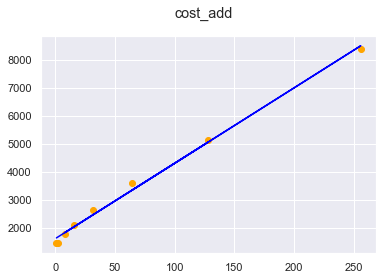

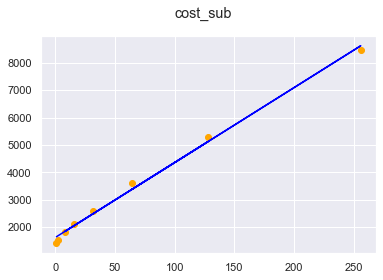

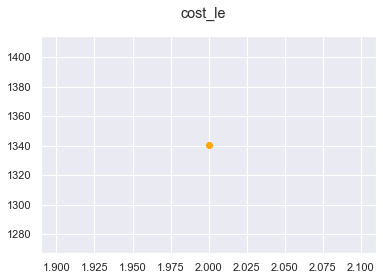

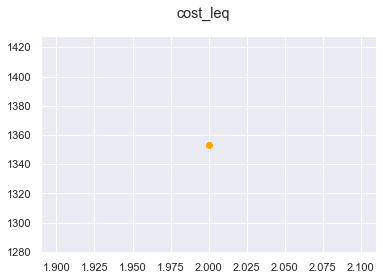

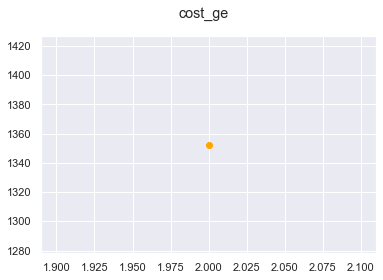

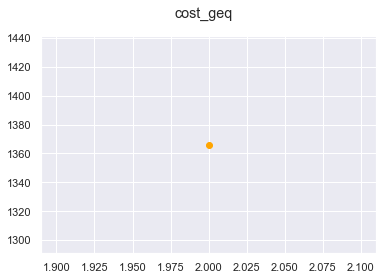

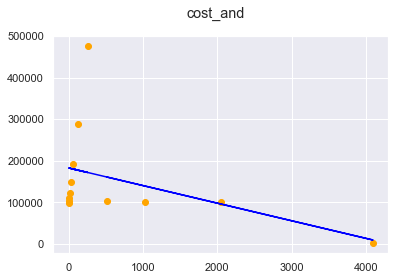

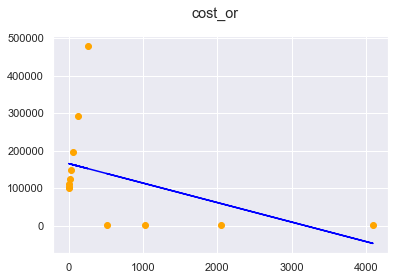

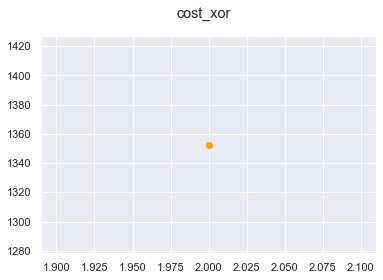

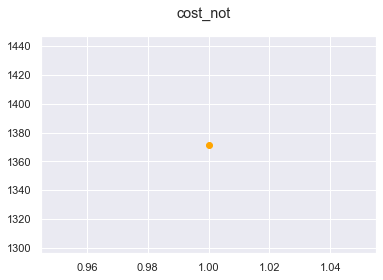

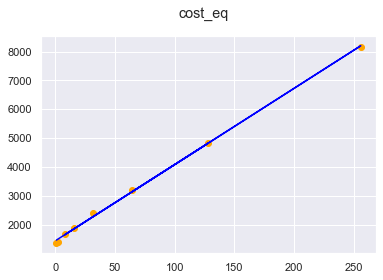

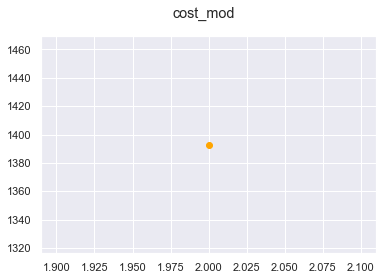

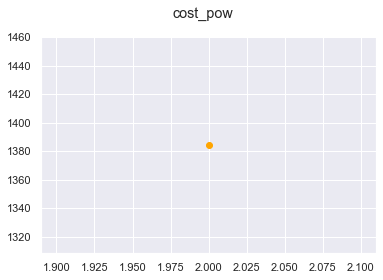

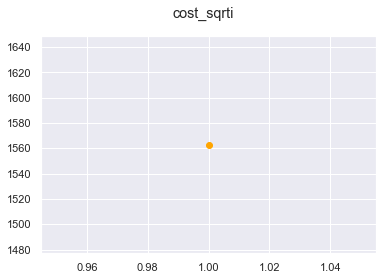

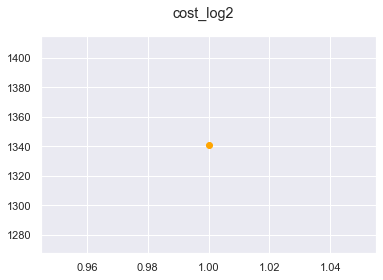

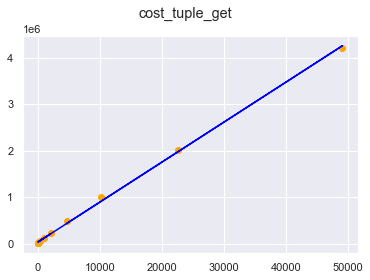

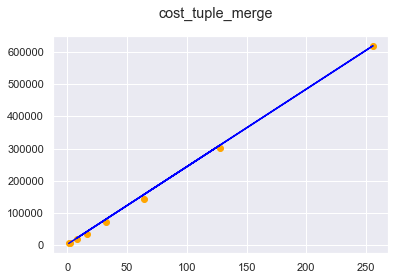

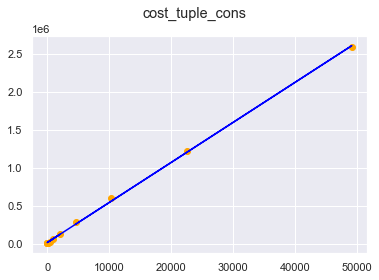

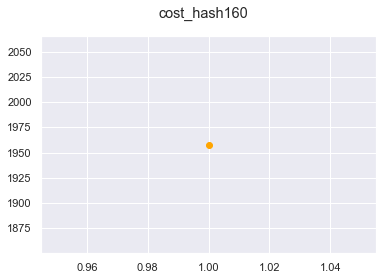

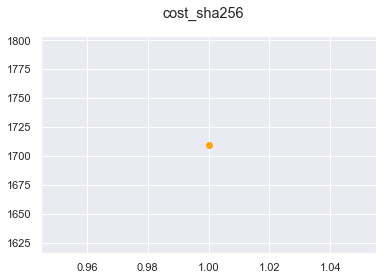

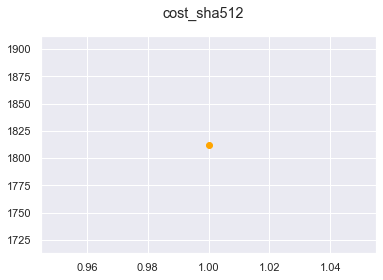

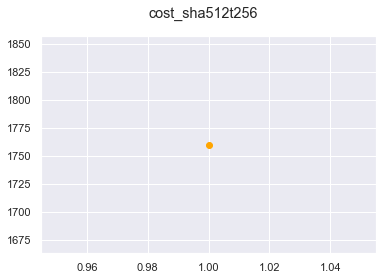

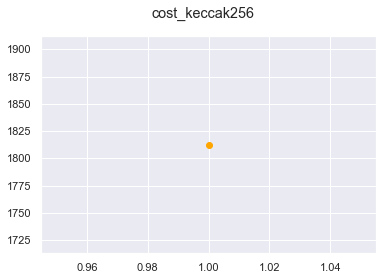

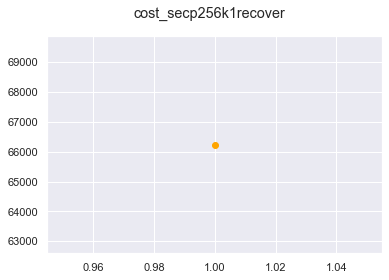

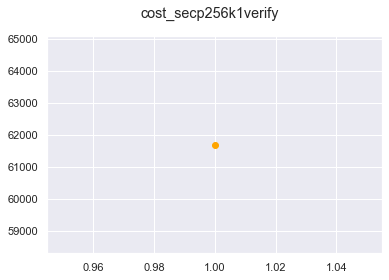

,a,b
cost_add,26.832064059981743,1620.827122
cost_sub,27.353794302122306,1622.673963
cost_le,0.0,1340.752366
cost_leq,0.0,1353.428348
cost_ge,0.0,1352.489458
cost_geq,0.0,1366.153037
cost_and,-42.28503074499295,182779.696677
cost_or,-52.01098438293805,165341.513657
cost_xor,0.0,1352.671242
cost_not,0.0,1371.69172


In [4]:
output = pd.DataFrame(columns=["a", "b"])

estimate_plot(df, 'cost_add', output)
estimate_plot(df, 'cost_sub', output)
estimate_plot(df, 'cost_le', output)
estimate_plot(df, 'cost_leq', output)
estimate_plot(df, 'cost_ge', output)
estimate_plot(df, 'cost_geq', output)
estimate_plot(df, 'cost_and', output)
estimate_plot(df, 'cost_or', output)
estimate_plot(df, 'cost_xor', output)
estimate_plot(df, 'cost_not', output)
estimate_plot(df, 'cost_eq', output)
estimate_plot(df, 'cost_mod', output)
estimate_plot(df, 'cost_pow', output)
estimate_plot(df, 'cost_sqrti', output)
estimate_plot(df, 'cost_log2', output)
estimate_plot(df, 'cost_tuple_get', output, nlogn)
estimate_plot(df, 'cost_tuple_merge', output)
estimate_plot(df, 'cost_tuple_cons', output, nlogn)
estimate_plot(df, 'cost_hash160', output)
estimate_plot(df, 'cost_sha256', output)
estimate_plot(df, 'cost_sha512', output)
estimate_plot(df, 'cost_sha512t256', output)
estimate_plot(df, 'cost_keccak256', output)
estimate_plot(df, 'cost_secp256k1recover', output)
estimate_plot(df, 'cost_secp256k1verify', output)

output

In [5]:
output.to_csv("cost_constants.csv")

In [9]:
71241.3539776112 2.126736e+07

SyntaxError: invalid syntax (<ipython-input-9-1110dabad65a>, line 1)